# Multivariate linear regression

Dataset: facebook

Num of Instances: 500

Number of Attributes: 19

http://archive.ics.uci.edu/ml/datasets/Facebook+metrics

##(1) Reading

In [ ]:
# import
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# read data
df = pd.read_csv('dataset_Facebook.csv', sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df.shape

(500, 19)

## (2)Preparation

### (2.1) EDA

### (2.2) Pre-processing

#### Imputation

In [ ]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    object 
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime

#### Encoding

Label Encoding

In [ ]:
df.Type.value_counts()

Photo     421
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [ ]:
mapping = {'Photo': 1,
           'Status': 2,
           'Link': 3,
           'Video':4}

In [ ]:
df['Type'] = df['Type'].map(mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    int64  
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime

#### Normaization

#### Engineering

#### Feature Selection

Feature Importance

In [ ]:
list_of_cols = df.columns.to_list()

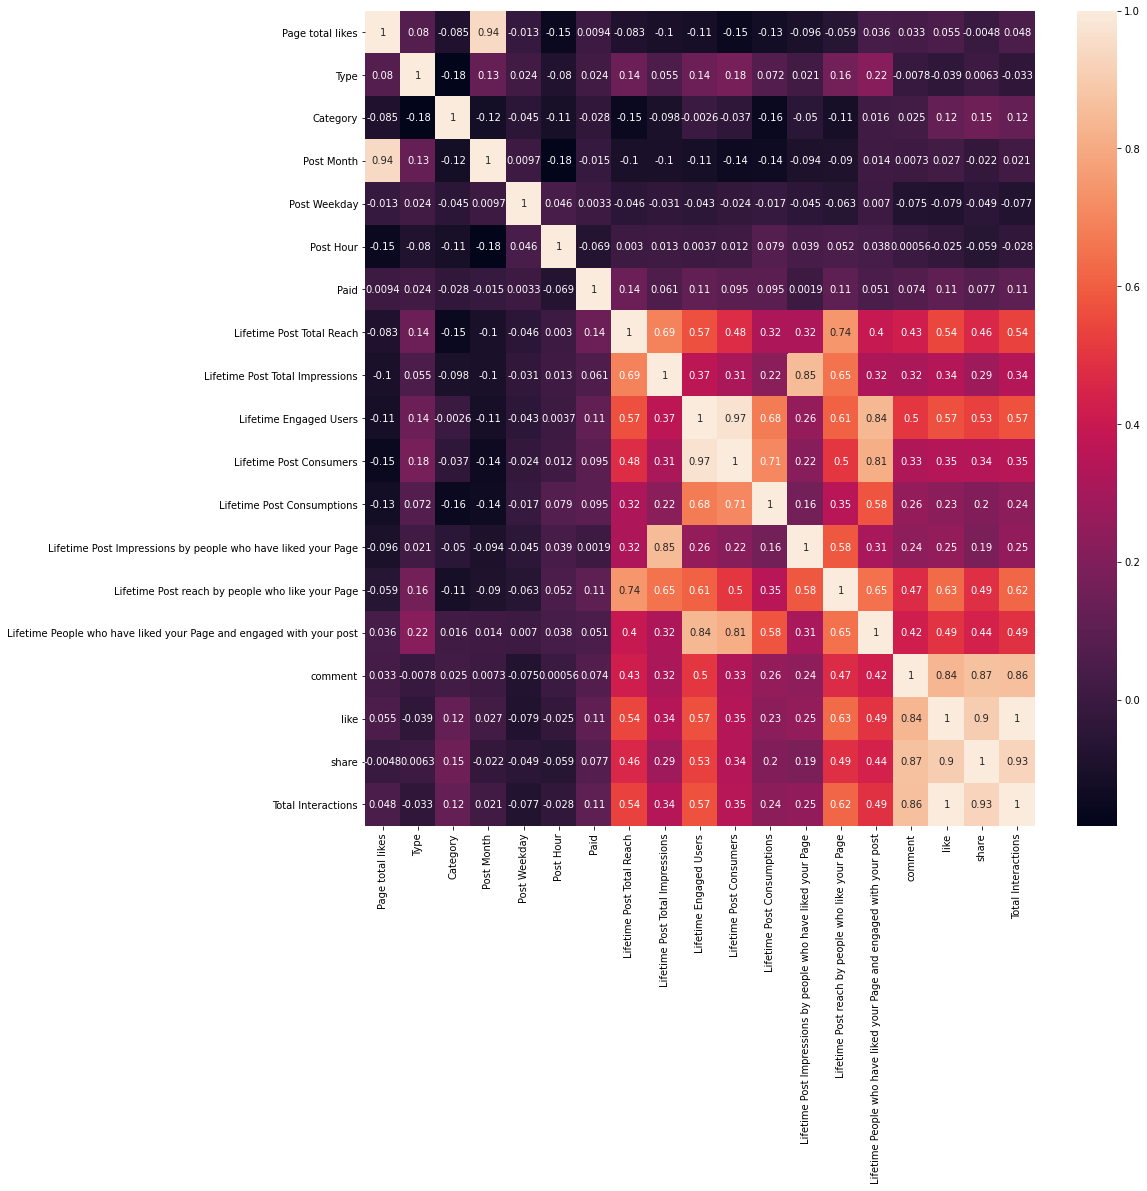

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = list_of_cols
# figsize задает размер картинки в дюймах
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True, ax=ax)

### (2.3)Splitting

In [ ]:
# drop target
x = df.drop("like", axis=1)
y = df["like"].copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(396, 18)
(396,)
(99, 18)
(99,)


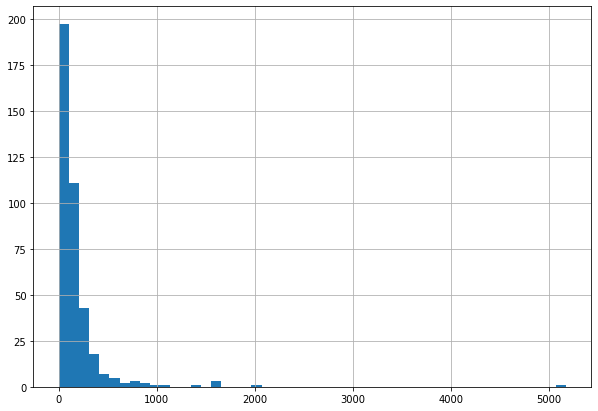

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y_train.hist(bins=50, figsize=(10,7))

## (3)Train

### model v.1 Perfect (all features)

In [ ]:
model = LinearRegression()
model = LinearRegression().fit(x_train, y_train)

In [ ]:
print('Coefficient (b₁, b2): \n', model.coef_)
print('Intercept (b₀): \n', model.intercept_)
print("Mean squared error: %.2f"
      % np.mean((model.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R² Value: \n', model.score(x_train, y_train))

Coefficient (b₁, b2): 
 [-1.92974137e-17 -3.90575159e-13  3.15195368e-13  1.30109092e-13
 -2.19874121e-14 -3.86287847e-14  4.71390730e-14  4.61736650e-17
 -1.30338997e-17  7.96810969e-16 -1.13571594e-15  1.68626128e-17
  2.00490468e-17 -9.62904990e-17  1.28698624e-16 -1.00000000e+00
 -1.00000000e+00  1.00000000e+00]
Intercept (b₀): 
 1.9326762412674725e-12
Mean squared error: 0.00
R² Value: 
 1.0


In [ ]:
y_pred= model.predict(x_test)
print(y_pred[:5])

[1546.  172.   24.  154.   79.]


In [ ]:
print(y_test[:5])

460    1546.0
73      172.0
314      24.0
179     154.0
337      79.0
Name: like, dtype: float64


### model v.2 (two features)

In [ ]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [ ]:
df_2 = df[['share', 'Total Interactions', 'like']]

In [ ]:
train2, test2 = train_test_split(df_2, test_size=0.2)

In [ ]:
# train2 = train2.values
# test2 = test2.values

In [ ]:
train2x = train2[:, :2]
test2x = test2[:, :2]
train2y = train2[:, 2:]
test2y = test2[:, 2:]

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(train2x,
          train2y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred2 = model2.predict(test2x)
print(y_pred2[:5])

[[37.3536562 ]
 [44.7615257 ]
 [45.08407685]
 [33.26069532]
 [55.73710538]]


In [ ]:
print(test2y[:5])

[[35.]
 [44.]
 [41.]
 [30.]
 [53.]]


### model v.3 (one feature)

In [ ]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [ ]:
df_3 = df[['Total Interactions', 'like']]

In [ ]:
train3, test3 = train_test_split(df_3, test_size=0.2)

In [ ]:
trainX = np.asarray(train3.comment).reshape(-1, 1)
trainY = np.asarray(train3.like)
testX = np.asarray(test3.comment).reshape(-1, 1)
testY = np.asarray(test3.like)

In [ ]:
model3 = LinearRegression()

In [ ]:
model = LinearRegression().fit(trainX, trainY)

In [ ]:
from sklearn.metrics import mean_squared_error

print('Coefficient (b₁): ', model.coef_)
print('Intercept (b₀): ', model.intercept_)
print('Mean squared error: ', mean_squared_error(testY, model.predict(testX)))
# Explained variance score: 1 is perfect
print('R² Value: ', model.score(trainX, trainY))

Coefficient (b₁):  [10.5166786]
Intercept (b₀):  88.97660349682835
Mean squared error:  65362.564148439415
R² Value:  0.4621526762463934


In [ ]:
y_pred = model.predict(testX)
print(y_pred[0:5])

[152.07667512 110.00996071 120.52663931 162.59335373 162.59335373]


In [ ]:
print(testY[0:5])

[535. 227. 156. 146. 529.]


In [ ]:
p0 = go.Scatter(x=train3.comment, 
                y=train3.like,
                name='train data',
                mode='markers'
               )
p1 = go.Scatter(x=test3.comment, 
                y=test3.like,
                name='test data',
                mode='markers'
               )
yPred = pd.Series(model.predict(testX))
p2 = go.Scatter(x=test3.comment, 
                y=yPred,
                name="regression",
                mode='lines'
                )

In [ ]:
configure_plotly_browser_state()
offline.iplot([p0, p1, p2])

## (4)Analysis

Для данной модели берем MSE, MAE, R^2

In [ ]:
print('Коэффициенты (b₁, b2): \n', model2.coef_)
print('Смещение (b₀): \n', model2.intercept_)
print("Ср.кв.ошибка: %.2f"
      % np.mean((model2.predict(test2x) - test2y) ** 2))
# Explained variance score: 1 is perfect prediction
print('R²: \n', model2.score(train2x, train2y))

Коэффициенты (b₁, b2): 
 [[-1.23355338  0.97420263]]
Смещение (b₀): 
 [4.55331794]
Ср.кв.ошибка: 168.92
R²: 
 0.9992503608108235


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test2y, y_pred2)
rmse = np.sqrt(mse)
print('Среднеквадратичная ошибка:', mse)
print('Корень из ср. кв. ошибки:', rmse)

Среднеквадратичная ошибка: 168.91603528785265
Корень из ср. кв. ошибки: 12.996770186775354


Визуализация

In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = False)

In [ ]:
fearures = df_2.values[:, :2]
preds = model2.predict(features)
preds = pd.Series(preds.reshape(preds.shape[0],))

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
# Следующая функция необходима, если вы запускаете свой jupiter notebook в google colab

In [ ]:
import plotly as plt
import plotly.graph_objs as go


fig1 = go.Scatter3d(x=test2['share'],
                    y=test2['Total Interactions'],
                    z=test2['like'],
                    name="testdata",
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02), mode='markers')

fig2 = go.Scatter3d(x=train2['share'],
                    y=train2['Total Interactions'],
                    z=train2['like'],
                    name="traindata",
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02), mode='markers')


fig3 = go.Mesh3d(x=df_2['share'],
                    y=df_2['Total Interactions'],
                    z=preds,
                    opacity=0.5,)


#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="share"),
                                yaxis=dict( title="Total Interactions"),
                                zaxis=dict(title="Target (likes)")),)


configure_plotly_browser_state()
fig = go.Figure(data=[fig1, fig2, fig3], layout=mylayout)
offline.iplot(fig, filename='3d-axis-range')